In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
cm = pd.read_csv('Wholesale customers data.csv')

In [4]:
cm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
cm['Region'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
columns = cm.columns[2:]
data = cm[columns]

In [7]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Study the mount on class Fresh

In [9]:
fresh = cm['Fresh'].values.reshape(-1, 1)
fresh.shape

(440, 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca16f21b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca18f40130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca16f21880>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca18f406d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca18f409a0>],
 'means': []}

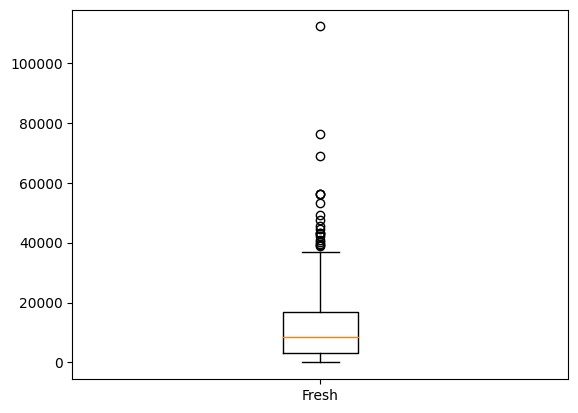

In [10]:
plt.boxplot(fresh, labels=['Fresh'])

Text(0.5, 0, 'Fresh')

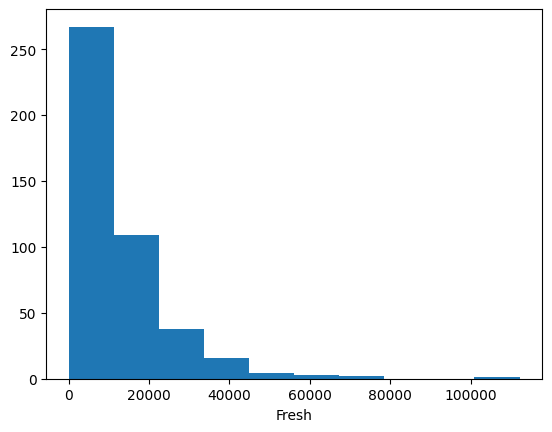

In [11]:
plt.hist(fresh, label='Fresh')
plt.xlabel('Fresh')

In [12]:
k_fresh = KMeans(n_clusters=3, random_state=1234)
k_fresh.fit(fresh)

KMeans(n_clusters=3, random_state=1234)

In [13]:
k_fresh.cluster_centers_

array([[ 5360.75254237],
       [20669.675     ],
       [48733.92      ]])

Text(0.5, 1.0, 'Statistics on fresh purchased by customers')

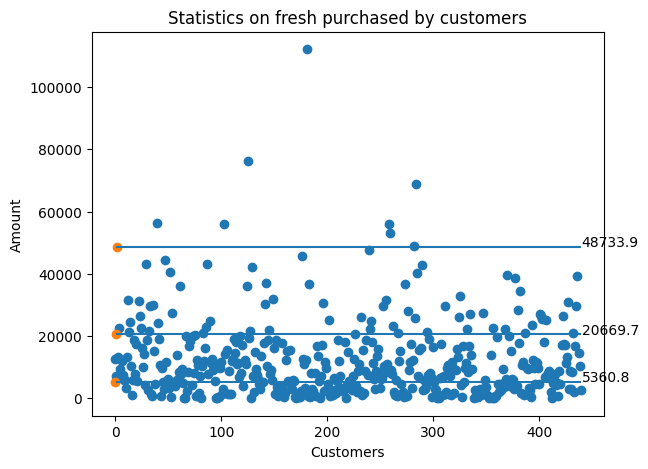

In [14]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8])
ax.scatter(range(fresh.shape[0]), fresh)
num_centers = len(k_fresh.cluster_centers_)
ax.scatter(range(num_centers), k_fresh.cluster_centers_)

for i in range(num_centers):
    ax.hlines(k_fresh.cluster_centers_[i], 1, fresh.shape[0]-1)
    ax.text(fresh.shape[0], k_fresh.cluster_centers_[i], f'{k_fresh.cluster_centers_[i][0]:.1f}')

ax.set_xlabel('Customers')
ax.set_ylabel('Amount')
ax.set_title('Statistics on fresh purchased by customers')

In [15]:
pred_fresh = np.argmin(k_fresh.transform(fresh), axis=1)

In [16]:
for i in range(5):
    print(f"Fresh {fresh[i][0]} -> Cluster {pred_fresh[i]}")

Fresh 12669 -> Cluster 0
Fresh 7057 -> Cluster 0
Fresh 6353 -> Cluster 0
Fresh 13265 -> Cluster 1
Fresh 22615 -> Cluster 1


## Study the relationship between Fresh and Frozen

In [17]:
ff = cm[['Fresh', 'Frozen']].values

ff.shape

(440, 2)

In [18]:
ff[:10]

array([[12669,   214],
       [ 7057,  1762],
       [ 6353,  2405],
       [13265,  6404],
       [22615,  3915],
       [ 9413,   666],
       [12126,   480],
       [ 7579,  1669],
       [ 5963,   425],
       [ 6006,  1159]], dtype=int64)

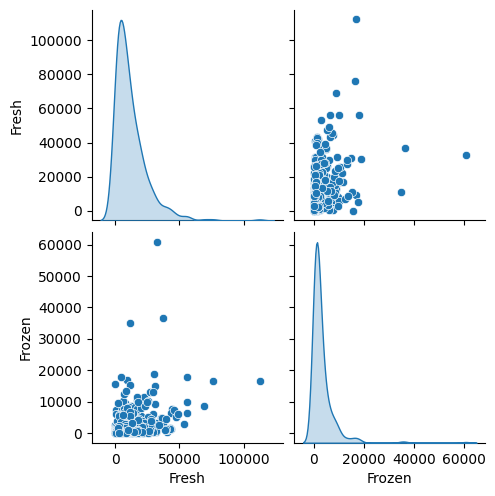

In [19]:
sns.pairplot(cm[['Fresh', 'Frozen']], diag_kind='kde')

### preprocessing

In [20]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# ff = scaler.fit_transform(ff)

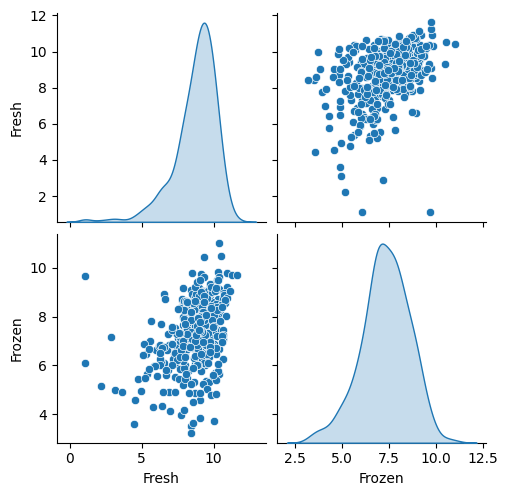

In [21]:
from sklearn.preprocessing import FunctionTransformer
log_ff = FunctionTransformer(np.log).fit_transform(cm[['Fresh', 'Frozen']].values)

sns.pairplot(pd.DataFrame(log_ff, columns=['Fresh', 'Frozen']), diag_kind='kde')

ff = log_ff

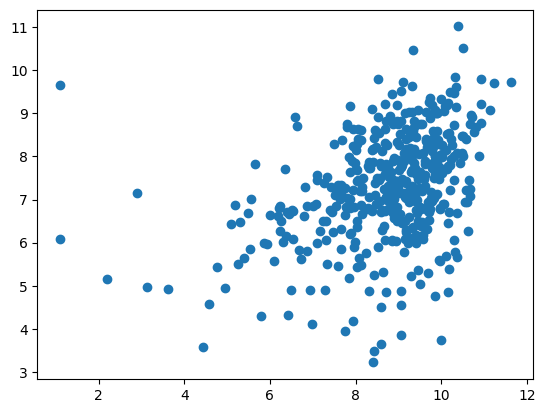

In [22]:
plt.scatter(ff[:, 0], ff[:, 1])

In [23]:
# k_ff = KMeans(n_clusters=3, init='k-means++', random_state=1234)
k_ff = KMeans(n_clusters=3, random_state=1234)
k_ff.fit(ff)

KMeans(n_clusters=3, random_state=1234)

In [24]:
label_ff = k_ff.labels_

In [25]:
label_ff

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0,
       1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0,

In [26]:
pred_ff = np.argmin(k_ff.transform(ff), axis=1)

In [27]:
pred_ff.shape

(440,)

In [28]:
pred_ff[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
ff[pred_ff == 0]

array([[ 9.44691334,  5.36597602],
       [ 8.86177531,  7.47420481],
       [ 9.14984699,  6.50128967],
       [ 9.40310719,  6.1737861 ],
       [ 8.93313654,  7.41997992],
       [ 8.69332899,  6.05208917],
       [ 8.70051425,  7.05531284],
       [ 9.48387281,  7.25841215],
       [10.3645135 ,  5.65948222],
       [10.11265388,  5.68357977],
       [ 9.23532562,  5.98393628],
       [ 8.67863154,  6.73221071],
       [ 8.95931162,  6.50578406],
       [ 9.77258128,  6.9716686 ],
       [ 9.69060369,  5.30330491],
       [ 9.56633508,  6.18414889],
       [ 8.32190797,  7.05444966],
       [ 9.8424097 ,  7.04577658],
       [ 7.86787149,  7.64396195],
       [ 9.98192898,  5.58349631],
       [ 8.43185314,  3.49650756],
       [ 9.29192036,  5.23644196],
       [ 9.17678359,  6.29341928],
       [ 8.55275337,  7.46164039],
       [ 8.04012466,  7.41938058],
       [ 9.35175312,  6.36990098],
       [ 8.51057132,  7.49443022],
       [ 8.1158197 ,  5.47646355],
       [10.61449921,

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


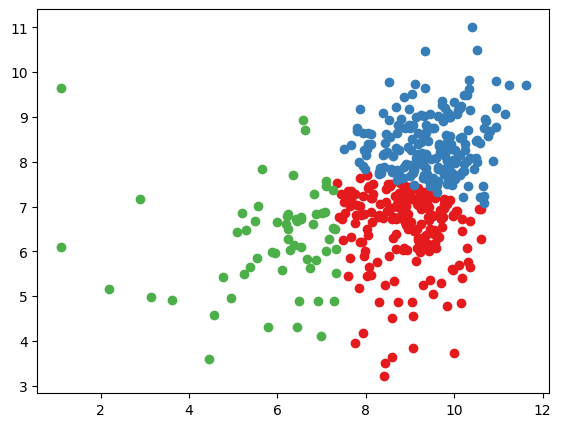

In [30]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8])
cmap = plt.cm.get_cmap('Set1').colors

for i in range(k_ff.n_clusters):
    members = ff[pred_ff == i]
    ax.scatter(members[:, 0], members[:, 1], c=cmap[i])

## Study whole dataset

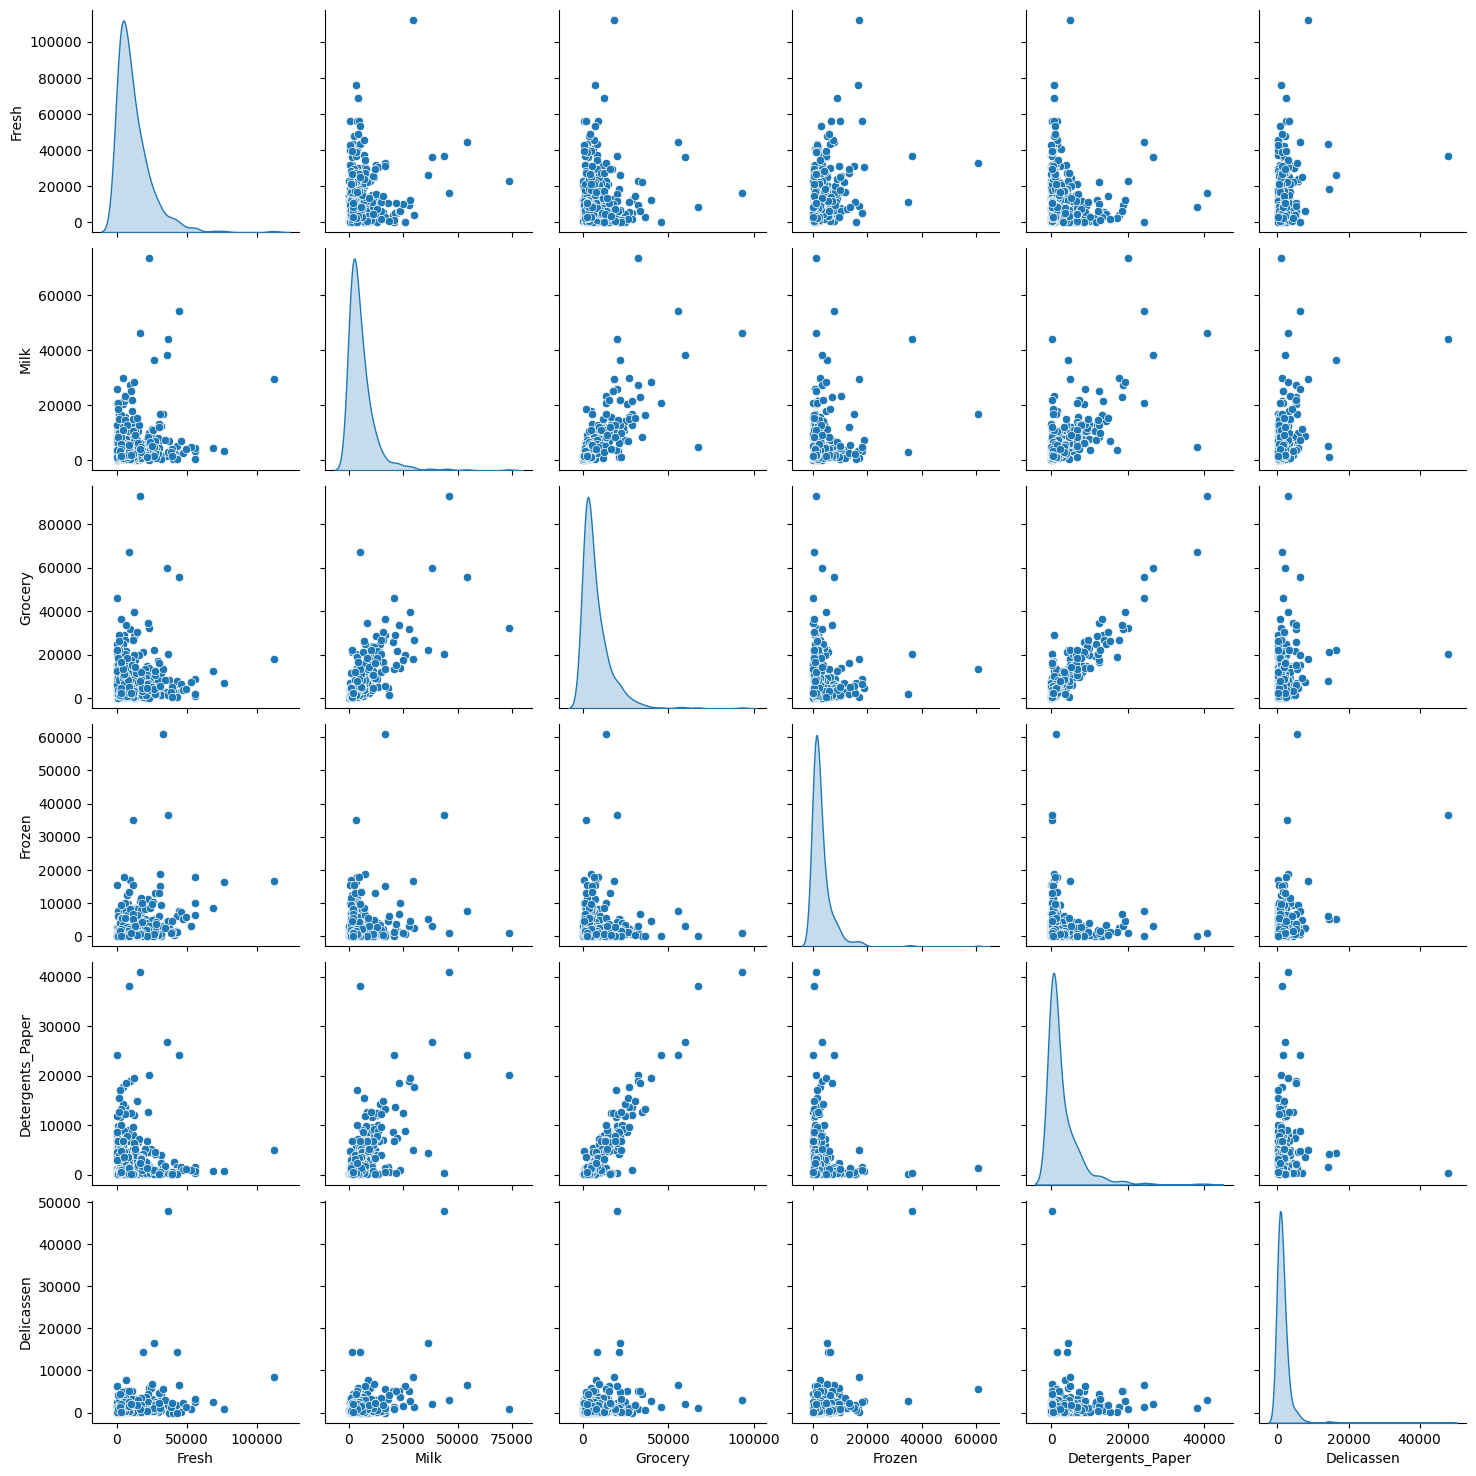

In [31]:
sns.pairplot(data, diag_kind='kde')

In [32]:
k_means = KMeans(n_clusters=6, init='k-means++', random_state=1234)
k_means.fit(data)

KMeans(n_clusters=6, random_state=1234)

In [33]:
k_means.labels_

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 4, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       4, 2, 0, 0, 1, 0, 2, 4, 0, 1, 0, 4, 1, 1, 4, 0, 2, 4, 0, 0, 2, 2,
       1, 2, 2, 3, 1, 2, 1, 1, 4, 2, 0, 1, 2, 2, 0, 1, 1, 3, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 3, 3, 4,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 5, 0, 0, 1, 2, 1, 2,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 4, 5, 0, 0, 1, 4, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 4, 4, 1, 0, 2, 1, 1, 1, 4, 0, 1, 0, 1,
       1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       4, 0, 1, 1, 0, 5, 1, 5, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 4, 1,
       0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 4, 0, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 0, 1,
       2, 2, 2, 0, 2, 0, 1, 1, 1, 4, 1, 1, 4, 1, 0, 0, 1, 0, 4, 0, 5, 4,
       1, 0, 0, 4, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0,

<AxesSubplot:>

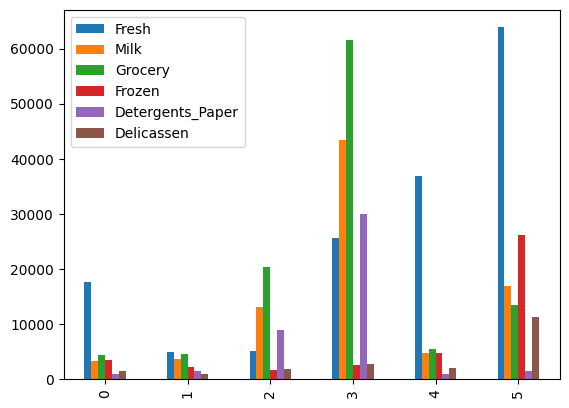

In [34]:
center = pd.DataFrame(k_means.cluster_centers_, columns=data.columns, )
center.plot(kind='bar')

In [35]:
from sklearn.preprocessing import FunctionTransformer
data_log = FunctionTransformer(np.log).fit_transform(data.values)

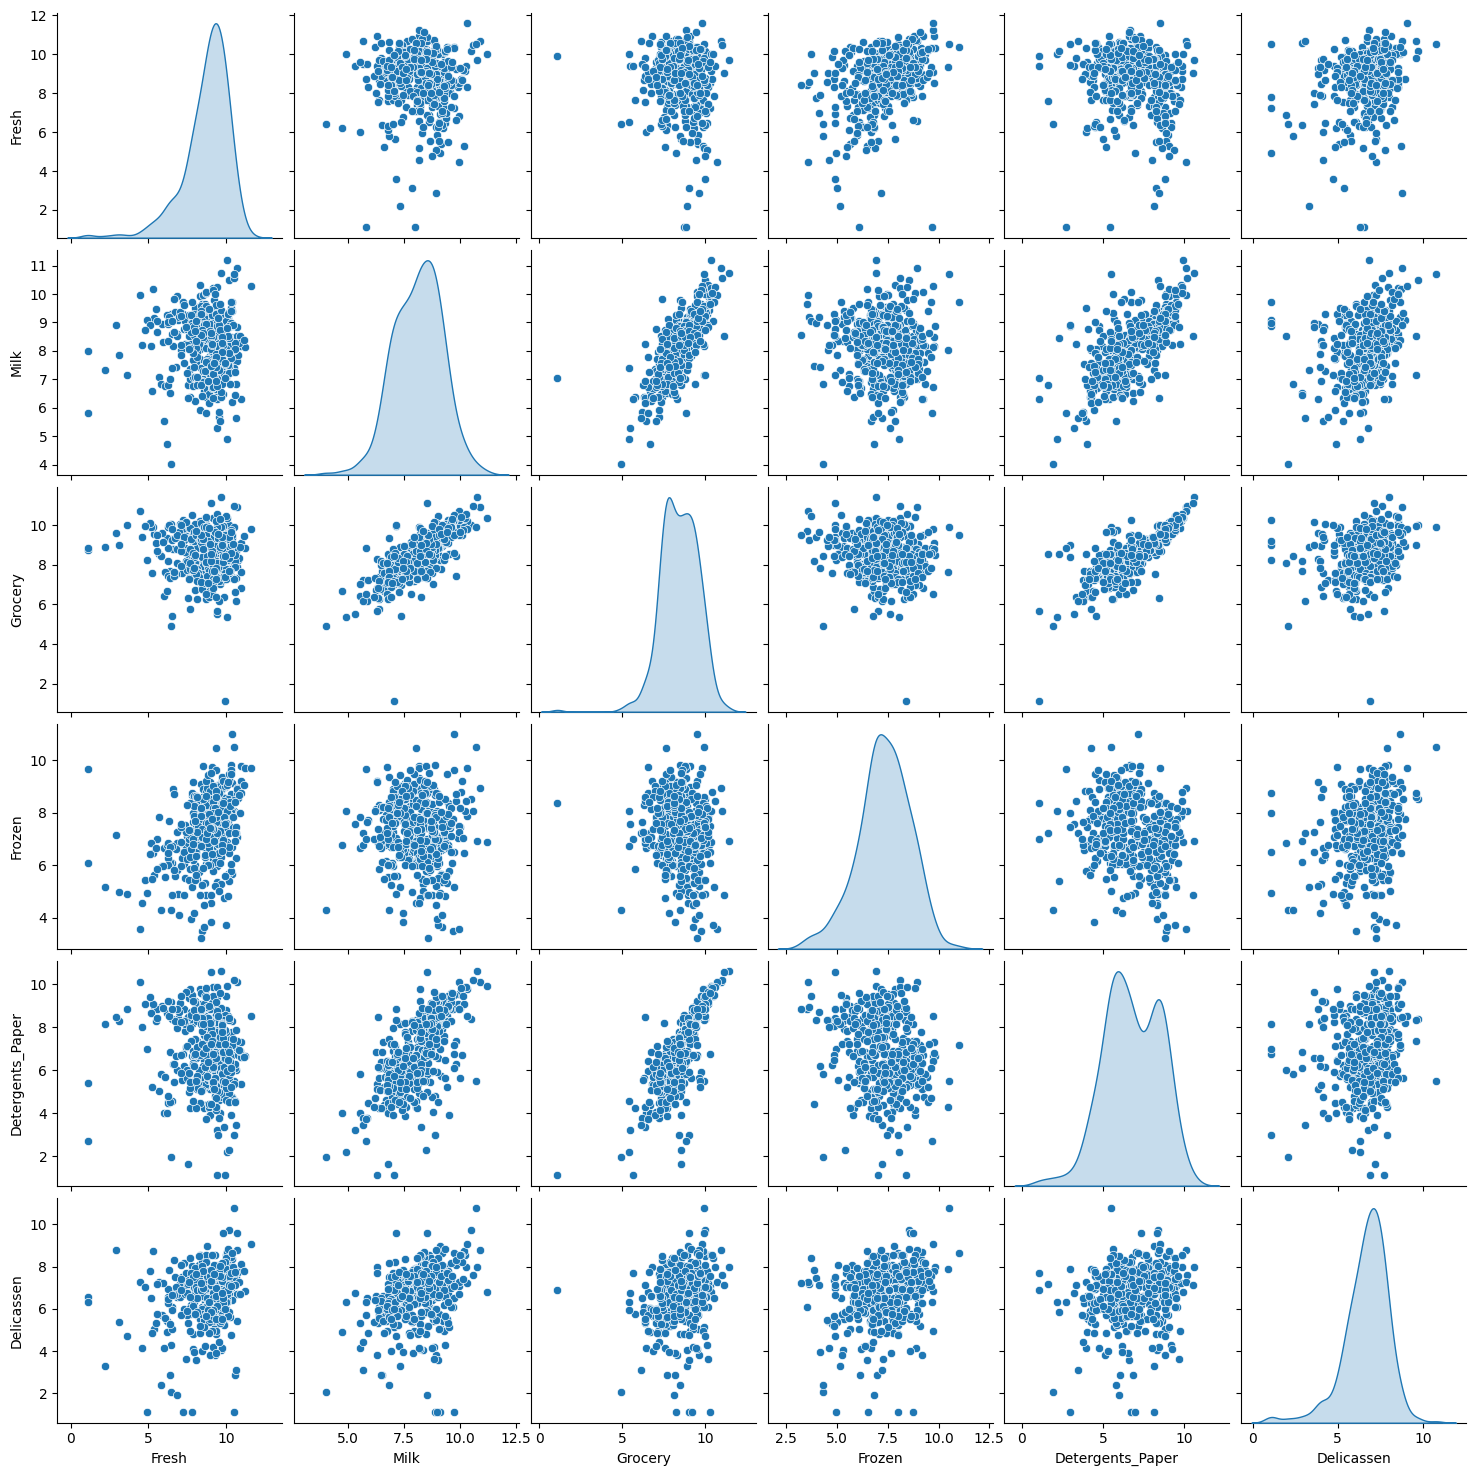

In [36]:
sns.pairplot(pd.DataFrame(data_log, columns=columns), diag_kind='kde')

In [37]:
def find_outliers(d):
    outliers = []
    for feature in d.keys():
        q1 = np.percentile(d[feature], 25)
        q3 = np.percentile(d[feature], 75)
        step = 1.5 * (q3 - q1)

        o = data[~((d[feature] >= (q1 - step)) & (d[feature] <= (q3 + step)))]
        outliers = np.concatenate((o.index, outliers))
    outliers = outliers.astype('uint')
    # print(outliers)
    return outliers

In [38]:
outliers = find_outliers(data)
df_log = pd.DataFrame(data_log, columns=columns)
data_log = df_log.drop(df_log.index[outliers]).reset_index(drop=True)

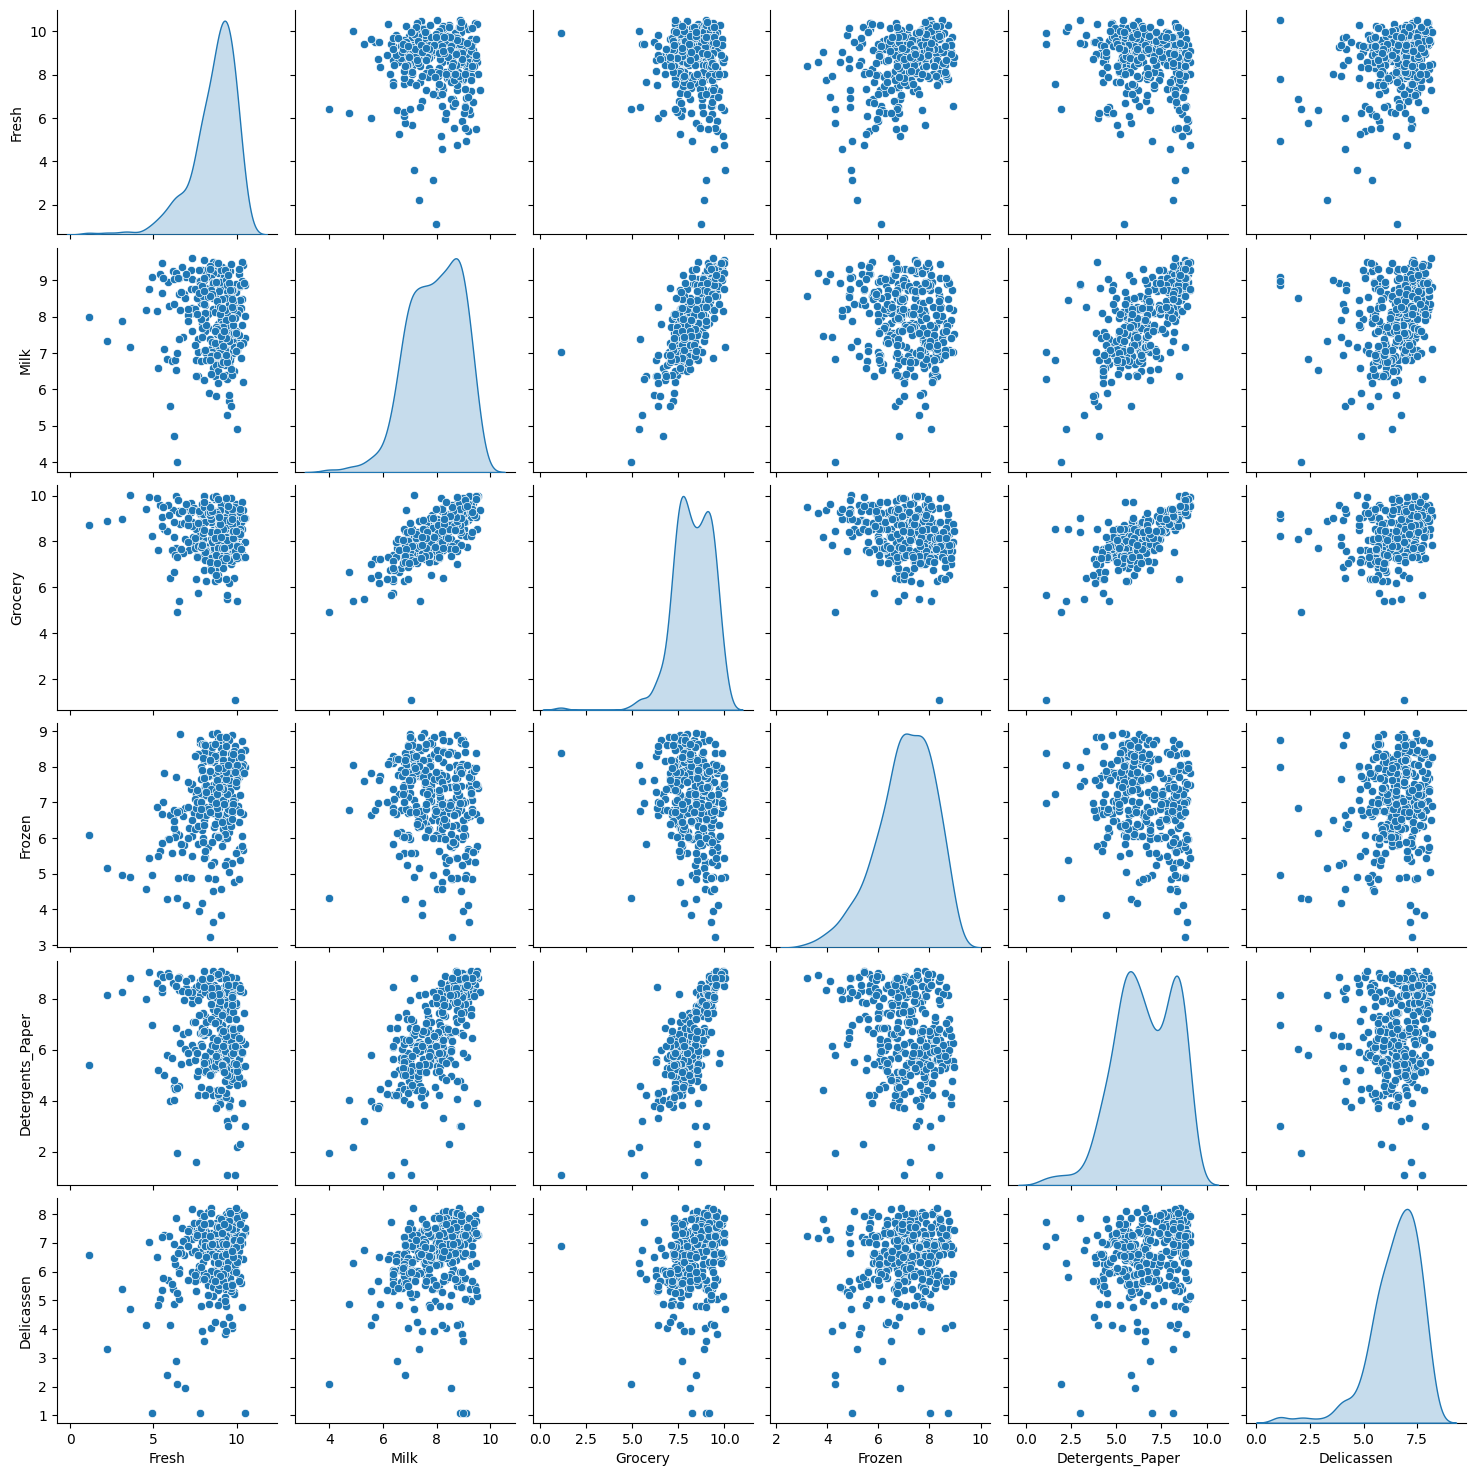

In [39]:
sns.pairplot(pd.DataFrame(data_log, columns=cm.columns[2:]), diag_kind='kde')

In [40]:
k_means_log = KMeans(n_clusters=6, init='k-means++', random_state=1234)
k_means_log.fit(data_log)

KMeans(n_clusters=6, random_state=1234)

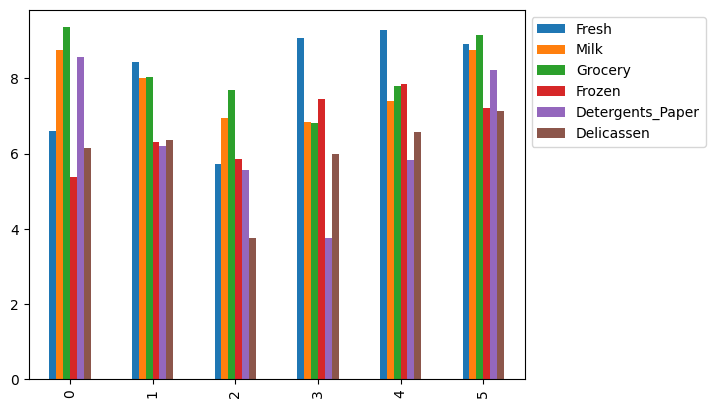

In [41]:
center = pd.DataFrame(k_means_log.cluster_centers_, columns=data.columns)
center.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

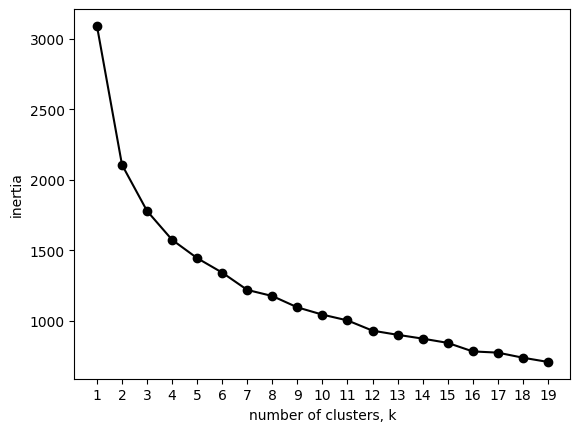

In [42]:
ks = range(1, 20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', random_state=1234)
    model.fit(data_log)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

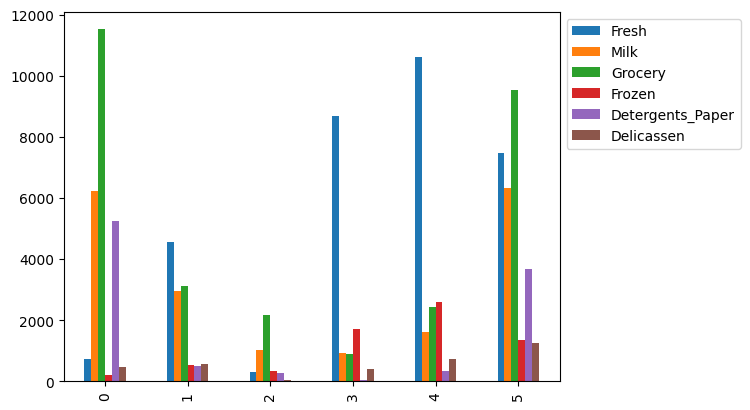

In [43]:
true_centers = np.exp(k_means_log.cluster_centers_)

center = pd.DataFrame(true_centers, columns=data.columns)
center.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))